In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from sklearn.datasets import make_regression

In [ ]:
x, y = make_regression(n_samples=1000, n_features=6, n_informative=15, noise=0.1, random_state=42)

In [ ]:
df = pd.DataFrame(x, columns=[f'col{i}' for i in range(x.shape[1])])
df['target'] = y
df

,col0,col1,col2,col3,col4,col5,target
0,1.124113,0.947526,-0.772878,-0.018709,-0.388518,0.407052,-10.215519
1,0.457280,1.455822,0.704507,-0.734174,0.081996,0.789057,112.130336
2,1.029156,0.472597,0.256030,0.408253,-1.702584,0.982691,80.500314
3,1.048483,0.487775,-0.734233,0.732829,-1.274232,-0.141530,-32.603443
4,1.363229,-0.303626,-0.488886,-0.190241,-1.497447,1.588940,18.347714
...,...,...,...,...,...,...,...
995,0.228996,-1.857901,0.603248,0.441307,-0.733156,0.298158,39.476316
996,-0.112328,-0.220970,0.614167,-0.699726,0.213980,0.757508,59.000679
997,-1.701902,-0.561338,-0.329489,-1.053835,0.427814,1.674860,-53.026053
998,0.078577,-2.128734,0.458168,-0.593811,-0.165631,-0.979721,-56.606293


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
X_scaled

array([[ 1.11867661,  0.94441563, -0.72849494, ..., -0.37407639,
         0.36190629, -0.07109124],
       [ 0.44743712,  1.43402305,  0.75360644, ...,  0.09525334,
         0.74736988,  1.03064877],
       [ 1.02309194,  0.48694829,  0.30369768, ..., -1.68483405,
         0.9427576 ,  0.74581638],
       ...,
       [-1.7260158 , -0.50897264, -0.28369087, ...,  0.44020176,
         1.64119413, -0.45660554],
       [ 0.06623085, -2.01874053,  0.50648147, ..., -0.15175035,
        -1.03742496, -0.48884606],
       [ 0.73624492, -0.1428344 , -0.60459597, ..., -0.63244778,
         1.28443692, -0.08463055]], shape=(1000, 7))

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

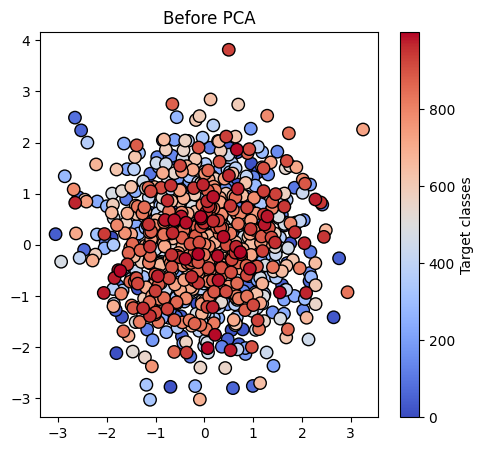

In [ ]:
y_numeric = pd.factorize(y)[0]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_numeric, cmap='coolwarm', edgecolor='k', s=80)
plt.title('Before PCA')
plt.colorbar(label='Target classes')


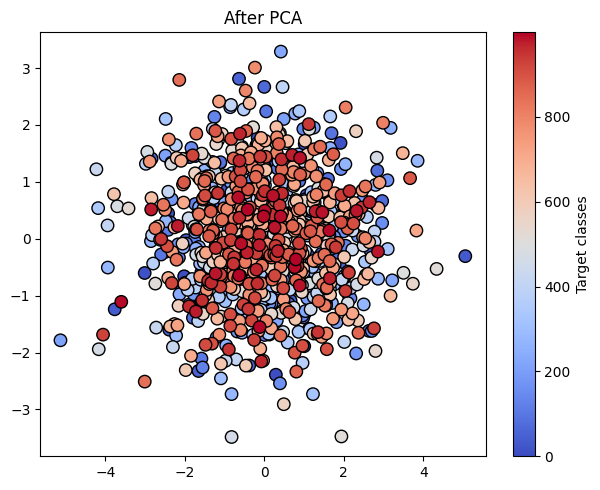

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_numeric, cmap='coolwarm', edgecolor='k', s=80)
plt.colorbar(label='Target classes')
plt.title('After PCA')
plt.tight_layout()
plt.show()

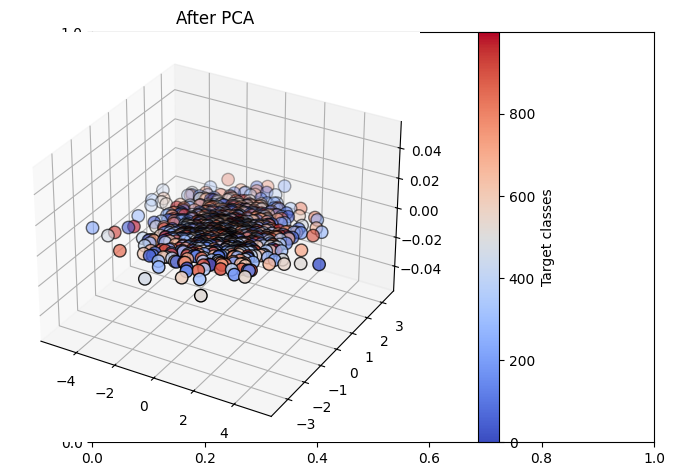

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.axes(projection='3d')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_numeric, cmap='coolwarm', edgecolor='k', s=80)
plt.colorbar(label='Target classes')
plt.title('After PCA')
plt.tight_layout()
plt.show()